In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# was getting Error: ValueError: cannot reindex from a duplicate axis
# then realized using full_pyber_data below was still associated with multiple 
# duplicates so have to use city_data to set_index
city_data = city_data.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
full_pyber_data = city_data.merge(ride_data, on = 'city')

# Display the data table for preview
full_pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

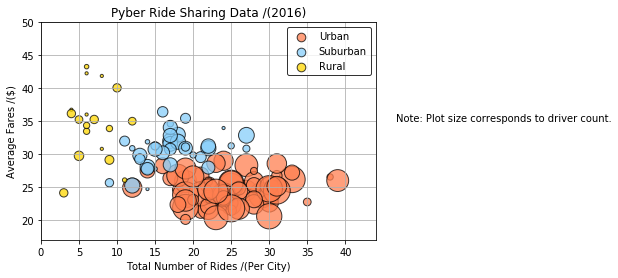

<Figure size 432x288 with 0 Axes>

In [25]:
##### Obtain the x and y coordinates for each of the three city types
plt.ylim(17,50)
plt.xlim(0,44)

# # # Build the scatter plots for each city types
group_by_city = full_pyber_data.groupby('city')

average_fare = group_by_city['fare'].mean()
city_type = city_data.set_index('city')['type']
ride_count = group_by_city['ride_id'].count()
driver_count = group_by_city['driver_count'].mean()

scatter_df = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": average_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})
scatter_df

# Isolate the data by type
urban = scatter_df.loc[scatter_df["Type of City"] == "Urban"]
suburban = scatter_df.loc[scatter_df["Type of City"] == "Suburban"]
rural = scatter_df.loc[scatter_df["Type of City"] == "Rural"]

plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = 'coral', edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = 'lightskyblue', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = 'gold', edgecolor = 'black', label = 'Rural', alpha = .75)

# # Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data /(2016)")
plt.xlabel("Total Number of Rides /(Per City)")
plt.ylabel("Average Fares /($)")

# # # Create a legend
legend_pyber = plt.legend(frameon = True, edgecolor = 'black')
legend_pyber.legendHandles[0]._sizes = [75]
legend_pyber.legendHandles[1]._sizes = [75]
legend_pyber.legendHandles[2]._sizes = [75]
plt.grid(True)

# # Incorporate a text label regarding circle size
t = 'Note: Plot size corresponds to driver count.'
plt.text(75, 35, t, ha = 'right', rotation=0)
# Save Figure
fig = plt.figure()
fig.savefig('pyber.png')

In [28]:
# Show plot
plt.show()

## Total Fares by City Type

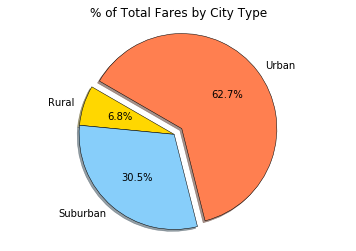

In [69]:
# Calculate Type Percent 
group_type = full_pyber_data.groupby('type')['type', 'ride_id', 'driver_count', 'fare']

fare_count = group_type.sum()['fare']
 
# Build Pie Chart
labels = fair_count.index

#colors and explosion
test_colors = {'Urban': 'coral', 
          'Suburban': 'lightskyblue', 
          'Rural': 'gold'
         }

type_colors = [test_colors[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(fare_count, startangle = 150, colors = type_colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

# Save Figure
fig.savefig('pyber_fare_share_pie.png')

## Total Rides by City Type

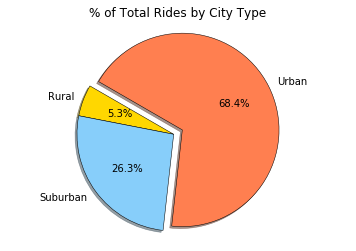

In [72]:
# Calculate Ride Percents
ride_count = group_type.count()['ride_id']
 
# Build Pie Chart
labels = ride_count.index
plt.pie(ride_count, startangle = 150, colors = type_colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()
# Save Figure
fig.savefig('pyber_rides_by_pie.png')

## Total Drivers by City Type

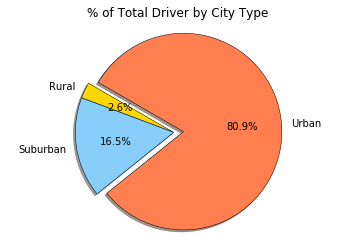

In [121]:
# Calculate Driver Percents
driver_counts = city_data.groupby('type')['type', 'driver_count'].sum()
driver_counts 
# # Build Pie Charts
labels = driver_counts.index
plt.pie(driver_counts, startangle = 150, colors = type_colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Driver by City Type')
plt.axis('equal')
plt.show()

# Save Figure
fig.savefig('pyber_drive_by_pie.png')

In [ ]:
The total fare is a smaller percentage for urban areas than the percentage of the number of rides, which is a smaller 
amount than the percentage of drivers. All of this means urban rides are shorter and cheaper with many more drivers,
while the suburban areas are a little bit longer, cost a little bit more, with fewer drivers, while rural areas have 
few drivers and long rides that cost more.